# Data Pipeline Implementation

The goal of this task is to build a data pipeline that effectively extracts, transforms, and loads (ETL) user data from a public API https://jsonplaceholder.typicode.com/users into a structured format suitable for analysis or storage.

In [1]:
'''
import libraries
'''
import requests
import pandas as pd
import sqlite3

import folium
import matplotlib.pyplot as plt

import functions as func #<<-- file with the functions

## 1. Using API https://jsonplaceholder.typicode.com/

In [2]:
'''
Define the Pipeline
'''
def api_data_pipeline(api_url, db_name, table_name):
    """Execute the ETL pipeline."""
    
    data = func.extract_api_data(api_url) # Extract

    transformed_data = func.transform_api_data(data, nested_field = True) # Transform
    
    func.load_data(transformed_data, db_name, table_name) # Load
    
    print("Data pipeline executed successfully!")


In [3]:
# Usage

api_url = 'https://jsonplaceholder.typicode.com/users'  # Public API for testing
db_name = 'users_data.db'
table_name = 'users'

api_data_pipeline(api_url, db_name, table_name)


Data pipeline executed successfully!


In [4]:
'''
Querying the SQLite 
'''
def query_data(db_name, table_name):
    """
    Query and display data from the SQLite database.
    param 
        db_name: str, database name
        table_name: str, table name
    """
    conn = sqlite3.connect(db_name)
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql(query, conn)
    conn.close()
    return df


In [5]:
# Usage

result_df = query_data(db_name, table_name)
print(result_df)

   id                      name          username                      email  \
0   1             Leanne Graham              Bret          Sincere@april.biz   
1   2              Ervin Howell         Antonette          Shanna@melissa.tv   
2   3          Clementine Bauch          Samantha         Nathan@yesenia.net   
3   4          Patricia Lebsack          Karianne  Julianne.OConner@kory.org   
4   5          Chelsey Dietrich            Kamren   Lucio_Hettinger@annie.ca   
5   6      Mrs. Dennis Schulist  Leopoldo_Corkery    Karley_Dach@jasper.info   
6   7           Kurtis Weissnat      Elwyn.Skiles     Telly.Hoeger@billy.biz   
7   8  Nicholas Runolfsdottir V     Maxime_Nienow       Sherwood@rosamond.me   
8   9           Glenna Reichert          Delphine    Chaim_McDermott@dana.io   
9  10        Clementina DuBuque    Moriah.Stanton     Rey.Padberg@karina.biz   

             city       lat        lng  
0     Gwenborough  -37.3159    81.1496  
1     Wisokyburgh  -43.9509   -34.461

In [6]:
# Descriptive statistics
user_count = result_df.shape[0]  
unique_usernames = result_df['username'].nunique()  
users_by_city = result_df['city'].value_counts()  

print(f"Total Users: {user_count}")
print(f"Unique Usernames: {unique_usernames}")
print("Users by City:\n", users_by_city)

Total Users: 10
Unique Usernames: 10
Users by City:
 city
Gwenborough       1
Wisokyburgh       1
McKenziehaven     1
South Elvis       1
Roscoeview        1
South Christy     1
Howemouth         1
Aliyaview         1
Bartholomebury    1
Lebsackbury       1
Name: count, dtype: int64


In [7]:
# User Demographics Analysis

# Extract email domains
result_df['email_domain'] = result_df['email'].str.split('@').str[1]
email_domain_counts = result_df['email_domain'].value_counts()

# Display the top email domains
print("Email Domains:\n", email_domain_counts)


Email Domains:
 email_domain
april.biz      1
melissa.tv     1
yesenia.net    1
kory.org       1
annie.ca       1
jasper.info    1
billy.biz      1
rosamond.me    1
dana.io        1
karina.biz     1
Name: count, dtype: int64


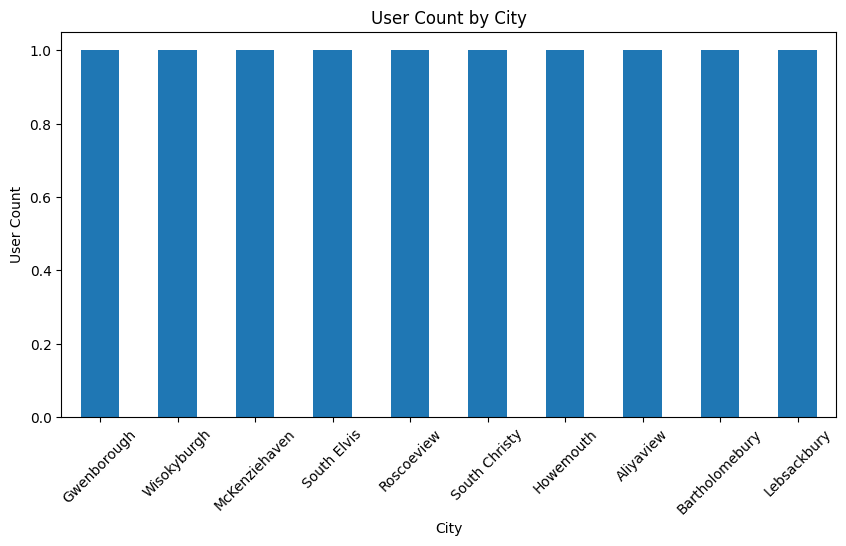

In [8]:
# Count users by city
users_by_city = result_df['city'].value_counts()

# Plotting
plt.figure(figsize=(10, 5))
users_by_city.plot(kind='bar')
plt.title('User Count by City')
plt.xlabel('City')
plt.ylabel('User Count')
plt.xticks(rotation=45)
plt.show()


In [9]:
# Data Quality Assessment

missing_values = result_df.isnull().sum() # missing values
duplicates = result_df.duplicated().sum() # for duplicates


print("Missing Values:\n", missing_values)
print(f"Number of Duplicates: {duplicates}")


Missing Values:
 id              0
name            0
username        0
email           0
city            0
lat             0
lng             0
email_domain    0
dtype: int64
Number of Duplicates: 0


In [10]:
# Comparing users between two cities
comparison_cities = result_df[result_df['city'].isin(['Gwenborough', 'Romaguera-Cohn'])]  # Example cities
city_comparison = comparison_cities['city'].value_counts()

print("User Count Comparison:\n", city_comparison)


User Count Comparison:
 city
Gwenborough    1
Name: count, dtype: int64


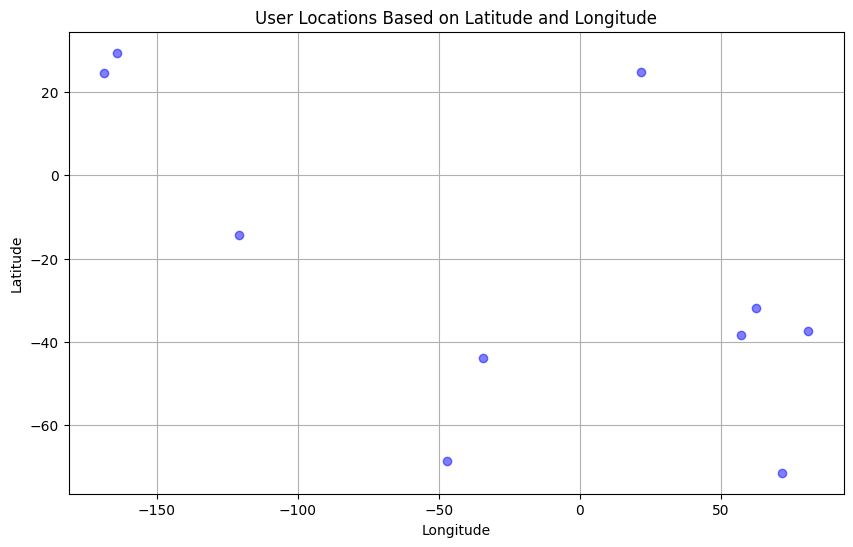

In [11]:
# Extract latitude and longitude for plotting
latitudes = result_df['lat'].astype(float)
longitudes = result_df['lng'].astype(float)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, alpha=0.5, c='blue', marker='o')
plt.title('User Locations Based on Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

In [12]:
# !pip install folium
# !python3 -m pip install folium

In [13]:

# Create a map centered around the average latitude and longitude
map_center = [result_df['lat'].astype(float).mean(), result_df['lng'].astype(float).mean()]
user_map = folium.Map(location=map_center, zoom_start=2)

# Add user locations to the map
for _, row in result_df.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=row['name'],  # You can customize the popup with other info
    ).add_to(user_map)

# Save the map to an HTML file
user_map.save('user_locations_map.html')

# Display the map in Jupyter Notebook 
user_map


# 2. Generate Fake User Data (large data)

In [14]:
'''
additional library import
'''
from faker import Faker

In [15]:
# Initialize Faker
fake = Faker()

# Generate fake user data
def create_user_data(num_users):
    users = []
    for _ in range(num_users):
        user = {
            'id': _ + 1,  # Sequential ID (1, 2, 3, ...)
            'name': fake.name(),
            'username': fake.user_name(),
            'email': fake.email(),
            'address': {
                'street': fake.street_address(),
                'suite': fake.secondary_address(),
                'city': fake.city(),
                'zipcode': fake.zipcode(),
                'geo': {
                    'lat': fake.latitude(),
                    'lng': fake.longitude()
                }
            }
        }
        users.append(user)
    return users

# Create a DataFrame with 100k fake users
num_users = 100000
fake_users = create_user_data(num_users)
fake_df = pd.DataFrame(fake_users)

print(fake_df.head()) # first few rows

# Save to CSV for later analysis
fake_df.to_csv('./data/fake_user_data.csv', index=False)


   id             name     username                         email  \
0   1   Michael Arroyo      peter28      samuelwilson@example.org   
1   2      Mary Miller  santostyler           qmedina@example.net   
2   3    Caroline Hill    hmarshall         william30@example.net   
3   4  Matthew Huffman      steve58     russellriddle@example.net   
4   5  Jeremiah Walker        upena  johnsonkatherine@example.net   

                                             address  
0  {'street': '4103 Jimenez Park', 'suite': 'Suit...  
1  {'street': '228 Denise Rue', 'suite': 'Suite 0...  
2  {'street': '87942 Ramos Lights', 'suite': 'Apt...  
3  {'street': '495 Perez Shoal', 'suite': 'Suite ...  
4  {'street': '50033 Ruiz Port', 'suite': 'Apt. 0...  


In [16]:
import importlib
importlib.reload(func)

<module 'functions' from '/Users/abdullahi/Documents/github/ML_tools/pipeline/functions.py'>

In [17]:
# data pipeline for faker data
def data_pipeline(file_path, db_name, table_name):
    '''
    Execute the ETL pipeline.
    param 
        file_path: str, file path
        db_name: str, database name
        table_name: str, table name
    '''
    # Step 1: Extract
    data = func.extract_faker_data(file_path)
    print(data['address'][0])
    # Step 2: Transform
    transformed_data = func.transform_faker_data(data)
    
    # Step 3: Load
    func.load_data(transformed_data, db_name, table_name)
    print("Data pipeline executed successfully!")

# Usage
file_path = './data/fake_user_data.csv' 
db_name = 'fake_users_data.db'
table_name = 'users'

data_pipeline(file_path, db_name, table_name)


{'street': '4103 Jimenez Park', 'suite': 'Suite 250', 'city': 'Hoodton', 'zipcode': '94747', 'geo': {'lat': Decimal('-46.3663245'), 'lng': Decimal('97.589984')}}
Data pipeline executed successfully!


In [18]:
def query_fake_data(db_name, table_name):
    '''
    Query and display data from the SQLite database.
    param 
        db_name: str, database name
        table_name: str, table name
    '''
    
    conn = sqlite3.connect(db_name)
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql(query, conn)
    conn.close()
    return df

# Usage
result = query_data(db_name, table_name)
print(result.head()) 



   id             name     username                         email  \
0   1   Michael Arroyo      peter28      samuelwilson@example.org   
1   2      Mary Miller  santostyler           qmedina@example.net   
2   3    Caroline Hill    hmarshall         william30@example.net   
3   4  Matthew Huffman      steve58     russellriddle@example.net   
4   5  Jeremiah Walker        upena  johnsonkatherine@example.net   

               city          lat         lng  
0           Hoodton  -46.3663245   97.589984  
1      West Michael   -30.218003   97.434351  
2          Bradland    56.641524  -97.626184  
3    West Jamesview  -89.6899015   11.090248  
4  Robertsonchester   -29.884639  -41.526768  


In [21]:
# Descriptive statistics
user_count = result.shape[0]  
unique_usernames = result['username'].nunique()  
users_by_city = result['city'].value_counts()  

print(f"Total Users: {user_count}")
print(f"Total Username: {unique_usernames}")
print(f"Total city: {users_by_city}")

Total Users: 100000
Total Username: 71922
Total city: city
Port Michael      94
New Michael       90
South Michael     89
East Michael      83
North Michael     82
                  ..
Johnathanview      1
Blevinsside        1
North Meredith     1
Clementsbury       1
Hannastad          1
Name: count, Length: 38046, dtype: int64


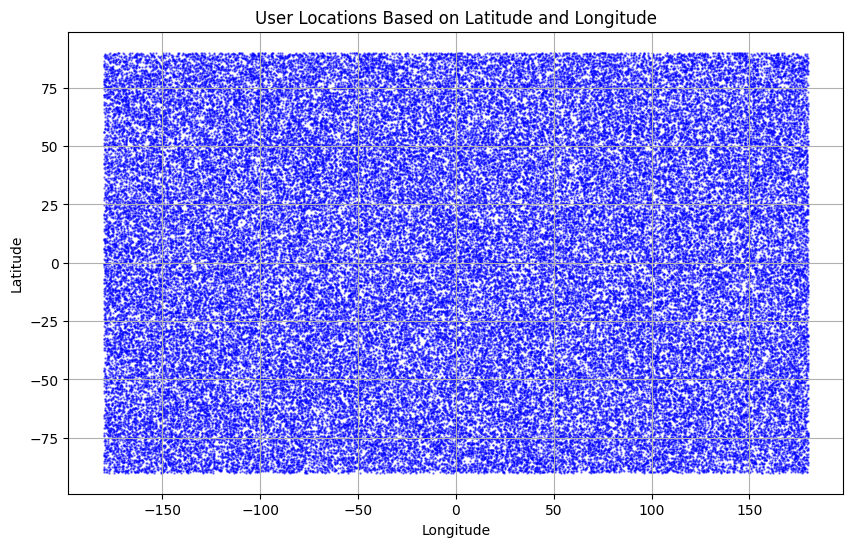

In [27]:
# Extract latitude and longitude for plotting
latitudes = result['lat'].astype(float)
longitudes = result['lng'].astype(float)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, alpha=0.5, c='blue', marker='o', s = 0.5)
plt.title('User Locations Based on Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()